<a href="https://colab.research.google.com/github/Sanil967/numpy/blob/main/set1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SET-2**
 1. Select and display the first five rows of the 'Name' and 'Age' columns from the
Titanic dataset using Pandas.
 2. Calculate the mean age of passengers aboard the Titanic using NumPy.
 3. Create a subset of the dataset containing only passengers who survived. How many
passengers survived?
 4. Identify and drop any rows with missing values in the 'Age' column. How many rows
 were dropped?
 5. Group the dataset by passenger class (Pclass) and calculate the average age of
passengers in each class.
 6. Convert the 'Sex' column to numerical values (e.g., 0 for female, 1 for male)
 7. Define the Independent variable and the dependent variable in the dataset  for
prediction of Survival.
 8. Split the dataset into two parts, one for  training and other for testing in 80:20 ratio.
 9. Apply a Logistic Regression model and KNN model to predict whether that person
survived the sinking of the ship.
 10. Print confusion matrix to see how the model performed during testing and accuracy
score for both the models.
 11. Compare the accuracy of both the models using bar graph.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Data=sns.load_dataset('titanic')
Data.dropna(inplace=True)

In [ ]:
Data[['age','who']].head(5)

,age,who
0,22.0,man
1,38.0,woman
2,26.0,woman
3,35.0,woman
4,35.0,man


In [ ]:
Data.dropna(inplace=True)

Use **numpy** to  calculate mean median mode

In [ ]:
mean=np.mean(Data['age'])
mean

np.float64(29.69911764705882)

In [ ]:
mean=np.median(Data['age'])
mean

np.float64(36.0)

In [ ]:
mean=np.sum(Data['age'])
mean

np.float64(6483.42)

In [ ]:
mean=np.unique(Data['age'])
mean

array([ 0.92,  1.  ,  2.  ,  3.  ,  4.  ,  6.  , 11.  , 14.  , 15.  ,
       16.  , 17.  , 18.  , 19.  , 21.  , 22.  , 23.  , 24.  , 25.  ,
       26.  , 27.  , 28.  , 29.  , 30.  , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  , 41.  ,
       42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 56.  , 57.  , 58.  ,
       60.  , 61.  , 62.  , 63.  , 64.  , 65.  , 70.  , 71.  , 80.  ])

Create a subset of the dataset containing only passengers who survived. How many passengers survived?

In [ ]:
Sur=Data[Data['survived']==1].shape[0]
print("the no of passanger survived",Sur)

the no of passanger survived 123


Identify and drop any rows with missing values in the 'Age' column. How many rows were dropped?

In [ ]:
cnt=Data['age'].isnull().sum()
cnt
Data.dropna(subset=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Group the dataset by passenger class (Pclass) and calculate the average age of passengers in each class.

In [ ]:
Data.groupby('pclass')['age'].mean()

,age
pclass,
1,38.233441
2,29.877630
3,25.140620


Convert the 'Sex' column to numerical values (e.g., 0 for female, 1 for male)

In [ ]:
Data['sex']=Data['sex'].map({'male':1,'female':0})
Data['sex']

,sex
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


Define the Independent variable and the dependent variable in the dataset for prediction of Survival.

In [ ]:
x=Data[['sex','age','sibsp','parch']]
y=Data['survived']
x,y

(     sex   age  sibsp  parch
 1      0  38.0      1      0
 3      0  35.0      1      0
 6      1  54.0      0      0
 10     0   4.0      1      1
 11     0  58.0      0      0
 ..   ...   ...    ...    ...
 871    0  47.0      1      1
 872    1  33.0      0      0
 879    0  56.0      0      1
 887    0  19.0      0      0
 889    1  26.0      0      0
 
 [182 rows x 4 columns],
 1      1
 3      1
 6      0
 10     1
 11     1
       ..
 871    1
 872    0
 879    1
 887    1
 889    1
 Name: survived, Length: 182, dtype: int64)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(     sex   age  sibsp  parch
 571    0  53.0      2      0
 473    0  23.0      0      0
 681    1  27.0      0      0
 809    0  33.0      1      0
 453    1  49.0      1      0
 ..   ...   ...    ...    ...
 429    1  32.0      0      0
 887    0  19.0      0      0
 337    0  41.0      0      0
 583    1  36.0      0      0
 449    1  52.0      0      0
 
 [145 rows x 4 columns],
      sex    age  sibsp  parch
 273    1  37.00      0      1
 741    1  36.00      1      0
 262    1  52.00      1      1
 136    0  19.00      0      2
 305    1   0.92      1      2
 325    0  36.00      0      0
 21     1  34.00      0      0
 310    0  24.00      0      0
 452    1  30.00      0      0
 789    1  46.00      0      0
 319    0  40.00      1      1
 170    1  61.00      0      0
 698    1  49.00      1      1
 737    1  35.00      0      0
 390    1  36.00      1      2
 689    0  15.00      0      1
 641    0  24.00      0      0
 587    1  60.00      1      1
 796    0  49.00      0 

In [ ]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
regg=reg.predict(x_test)
regg

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
kk=knn.predict(x_test)
kk

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
cc=confusion_matrix(y_test,regg)
cc


array([[ 7, 10],
       [ 3, 17]])

In [ ]:
cc=confusion_matrix(y_test,kk)
cc

array([[ 7, 10],
       [ 3, 17]])

In [ ]:
aa=accuracy_score(y_test,kk)
aa

0.6486486486486487

In [ ]:
aca=accuracy_score(y_test,regg)
aca

0.6486486486486487

<BarContainer object of 2 artists>

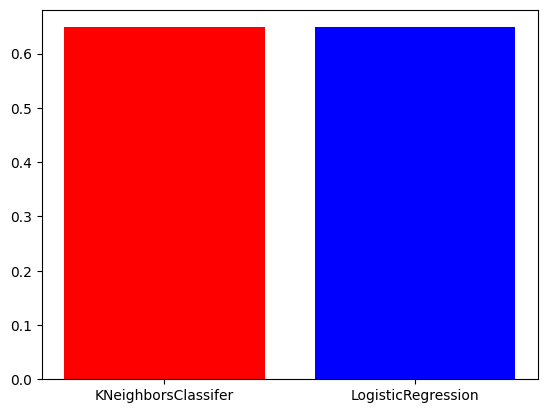

In [ ]:
x=[aa,aca]
y=["KNeighborsClassifer","LogisticRegression"]
colors=["red","blue"]
plt.bar(y,x,color=colors)

 1. Load the Iris dataset into a Pandas DataFrame and display only the 'sepal length' and
 'species' columns.
 2. Filter the dataset to include only rows where petal width is greater than 1.5.
 3. Compute the sum of petal lengths for all observations.
 4. Create a new column in the DataFrame called 'sepal_area' which represents the
product of sepal length and sepal width for each observation.
 5. Filter the dataset to include only rows where the species is 'setosa' and calculate the
maximum value of petal length for this subset using Pandas.
 6. Use Pandas to group the dataset by species and calculate the max of  sepal length for
each group.
 7. Define the Independent variable and the dependent variable in the dataset  for
prediction of Species of the plant.
 8. Split the dataset into two parts, one for  training and other for testing in 80:20 ratio.
 9. Apply a SVM  model and Decision Tree model to predict Species of the plant.
 10. Print confusion matrix to see how the model performed during testing and accuracy
score for both the models.
 11. Compare the accuracy of both the models using bar graph.

In [ ]:
dd1=sns.load_dataset('iris')
dd1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
dd1[['sepal_length','species']]


,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [ ]:
dd1[dd1['petal_width']>1.5]

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
70,5.9,3.2,4.8,1.8,versicolor
77,6.7,3.0,5.0,1.7,versicolor
83,6.0,2.7,5.1,1.6,versicolor
85,6.0,3.4,4.5,1.6,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [ ]:
dd1['petal_length'].sum()

np.float64(563.7)

In [ ]:
dd1['sepal_arae']=dd1['sepal_length']+dd1['sepal_width']
dd1['sepal_arae']

,sepal_arae
0,8.6
1,7.9
2,7.9
3,7.7
4,8.6
...,...
145,9.7
146,8.8
147,9.5
148,9.6


Filter the dataset to include only rows where the species is 'setosa' and calculate the maximum value of petal length for this subset using Pandas.

In [ ]:
aa=dd1[dd1['species']=='setosa']
aa['petal_length'].max()

1.9

In [ ]:
dd1.groupby('species')['sepal_length'].max()


,sepal_length
species,
setosa,5.8
versicolor,7.0
virginica,7.9


In [ ]:
x=dd1[['sepal_length','sepal_width','petal_length','petal_width']]
y=dd1[['species']]
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
        species
 0       setosa
 1       setosa
 2       setosa
 3       setosa
 4       setosa
 ..         ...
 145  virginica
 146  virginica
 147  virginica
 148  virginica
 149  virginica
 
 [150 rows x 1 columns])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(     sepal_length  sepal_width  petal_length  petal_width
 67            5.8          2.7           4.1          1.0
 1             4.9          3.0           1.4          0.2
 23            5.1          3.3           1.7          0.5
 141           6.9          3.1           5.1          2.3
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 42            4.4          3.2           1.3          0.2
 118           7.7          2.6           6.9          2.3
 93            5.0          2.3           3.3          1.0
 56            6.3          3.3           4.7          1.6
 57            4.9          2.4           3.3          1.0
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 14            5.8          4.0           1.2          0.2
 136           6.3          3.4           5.6          2.4
 33            5.5          4.2           1.4          0.2
 126           6.2          2

In [ ]:
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dcc_pred=dc.predict(x_test)
dcc_pred

array(['setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [ ]:
svc_pred=sv.predict(x_test)
svc_pred

array(['setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [ ]:
ac_dc=accuracy_score(y_test,dcc_pred)
ac_dc

1.0

In [ ]:
ac_svc=accuracy_score(y_test,svc_pred)
ac_svc


0.9333333333333333

<BarContainer object of 2 artists>

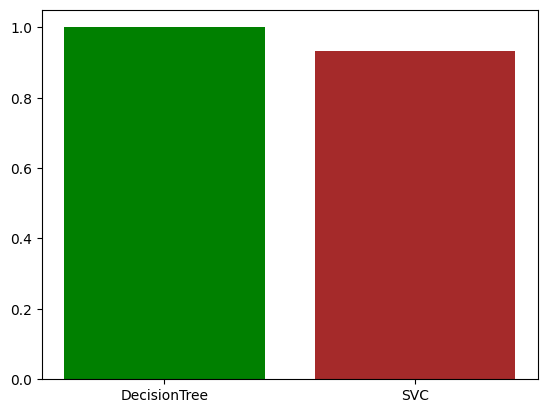

In [ ]:
x=[ac_dc,ac_svc]
y=['DecisionTree','SVC']
colors=['green','brown']
plt.bar(y,x,color=colors)